In [238]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px





# Lade das Datenset
charging_set = pd.read_csv("data/cleaned_charging_set.csv")
charging_set.head(3)



,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_year,requestedDeparture_month,requestedDeparture_day,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,...,2020.0,1.0,2.0,20:51:54,3.0,6.039167,4.378056,3,3,1.661111
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,...,2020.0,1.0,2.0,23:31:50,3.0,9.025278,6.687500,3,3,2.337778
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,...,2020.0,1.0,2.0,14:56:35,3.0,10.713056,2.641944,3,4,8.071111


In [239]:
print(charging_set.columns)
# Anzahl der Lade-Events pro Tag berechnen
charging_set['connectionTime_time'] = pd.to_datetime(charging_set['connectionTime_time'])
charging_set['hour'] = charging_set['connectionTime_time'].dt.hour


events_at_day = charging_set.groupby('hour').size().reset_index(name='count')

# Count all loading-events over the available timeframe, ploted on hours of the day
fig = px.bar(
    events_at_day,
    x='hour',
    y='count',
    title='Loading-events over the day (siteID = all)',
    labels={'hour': 'Hour', 'count': 'Number of loading-events'}
)

# Layout adjustment
fig.update_traces(marker_color='#00008B')  # Color
fig.update_layout(
    title_font_size=18,
    legend_title_text="Legend",
    template="plotly_white"
)

# Show grafic
fig.show()


for site_id in [1, 2]:
    site_data = charging_set[charging_set['siteID'] == site_id]
    site_events_at_day = site_data.groupby('hour').size().reset_index(name='count')

    # Interactive visualization
    fig = px.bar(
        site_events_at_day,
        x='hour',
        y='count',
        title=f'Loading-events over the day (siteID = {site_id})',
        labels={'hour': 'Hour', 'count': 'Number of loading-events'},
    )

    fig.update_traces(marker_color='#1f77b4')

# Layout adjustment
    fig.update_layout(
        title_font_size=18,
        legend_title_text="Legend",
        template="plotly_white"
    )

    # Show grafic
    fig.show()

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID', 'userID',
       'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable',
       'modifiedAt', 'paymentRequired', 'requestedDeparture', 'isRegistered',
       'connectionTime_year', 'connectionTime_month', 'connectionTime_day',
       'connectionTime_time', 'connectionTime_weekday', 'disconnectTime_year',
       'disconnectTime_month', 'disconnectTime_day', 'disconnectTime_time',
       'disconnectTime_weekday', 'doneChargingTime_year',
       'doneChargingTime_month', 'doneChargingTime_day',
       'doneChargingTime_time', 'doneChargingTime_weekday', 'modifiedAt_year',
       'modifiedAt_month', 'modifiedAt_day', 'modifiedAt_time',
       'modifiedAt_weekday', 'requestedDeparture_year',
       'requestedDeparture_month', 'requestedDeparture_day',
       'requestedDeparture_time', 'requestedDeparture_weekday',
       'connectionDuration', 

In [242]:
import pandas as pd
import plotly.express as px

# Convert datetime columns
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])
charging_set['disconnectTime'] = pd.to_datetime(charging_set['disconnectTime'])

# Function to calculate active events per hour
def calculate_hourly_activity(data, site_id=None):
    if site_id is not None:
        data = data[data['siteID'] == site_id]
    return pd.DataFrame([
        {'hour': hour, 'count': len(data[
            (data['connectionTime'].dt.hour <= hour) & 
            (data['disconnectTime'].dt.hour >= hour)
        ])} for hour in range(24)
    ])

# Plot function
def plot_activity(activity_df, title, color='#00008B'):
    fig = px.bar(
        activity_df, x='hour', y='count', title=title, 
        labels={'hour': 'Hour', 'count': 'Active Charging Events'}
    )
    fig.update_traces(marker_color=color)
    fig.update_layout(title_font_size=18, legend_title_text="Legend", template="plotly_white")
    fig.show()

# Overall activity
hourly_activity = calculate_hourly_activity(charging_set)
plot_activity(hourly_activity, 'Active Charging Events per Hour (siteID = all)')

# Activity per site
for site_id in [1, 2]:
    site_activity = calculate_hourly_activity(charging_set, site_id)
    plot_activity(site_activity, f'Active Charging Events per Hour (siteID = {site_id})', color='#1f77b4')


In [217]:
# Aggregation on months
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

events_per_month = charging_set.groupby('connectionTime_month').size().reset_index(name='count')

# Add month names
events_per_month['month_name'] = events_per_month['connectionTime_month'].map(month_names)

# Count all loading-events over the available timeframe, ploted on hours of the day
fig = px.bar(
    events_per_month,
    x='month_name',
    y='count',
    title='Loading-events per month (sideID = all)',
    labels={'hour': 'Month', 'count': 'Number of loading-events'}
)

# Layout adjustment
fig.update_traces(marker_color='#FF8C00')  # Color
fig.update_layout(
    title_font_size=18,
    legend_title_text="Legend",
    template="plotly_white"
)

# Show grafic
fig.show()



In [218]:
events_per_year = charging_set.groupby('connectionTime_year').size().reset_index(name='count')


# Count all loading-events over the available timeframe, ploted per year
fig = px.bar(
    events_per_year,
    x='connectionTime_year',
    y='count',
    title='Loading-events per year (siteID = all)',
    labels={'hour': 'connectionTime_year', 'count': 'Number of loading-events'}
)

# Layout adjustment
fig.update_traces(marker_color='#00008B')  # Color
fig.update_layout(
    title_font_size=18,
    legend_title_text="Legend",
    template="plotly_white",
     xaxis=dict(
        tickmode='array',  # Specify ticks explicitly
        tickvals=events_per_year['connectionTime_year'].unique(),  # Use unique years as tick values
        title="Year"
    )
)

# Show grafic
fig.show()




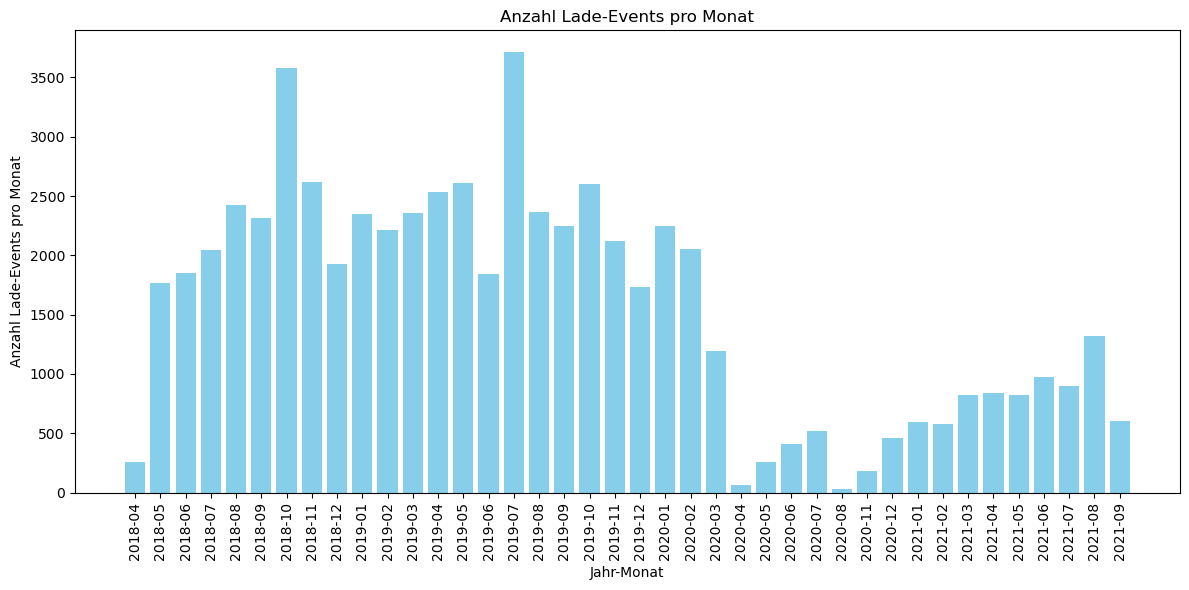

In [219]:
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])

# Jahr und Monat extrahieren
charging_set['year'] = charging_set['connectionTime_year']
charging_set['month'] = charging_set['connectionTime_month']

# Berechnung der durchschnittlichen Temperatur pro Jahr und Monat
avg_temperatures = charging_set.groupby(['year', 'month']).size().reset_index(name='count')

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
# Kombiniere Jahr und Monat für die X-Achse, z.B. '2022-01' für Januar 2022
avg_temperatures['year_month'] = avg_temperatures['year'].astype(str) + '-' + avg_temperatures['month'].astype(str).str.zfill(2)

# Erstellen des Balkendiagramms
plt.bar(avg_temperatures['year_month'], avg_temperatures['count'], color='skyblue')

# Titel und Beschriftungen
plt.title('Anzahl Lade-Events pro Monat')
plt.xlabel('Jahr-Monat')
plt.ylabel('Anzahl Lade-Events pro Monat')

# Optional: X-Achse formatieren (dreh die Labels, damit sie lesbar sind)
plt.xticks(rotation=90)

# Layout optimieren
plt.tight_layout()

# Diagramm anzeigen
plt.show()

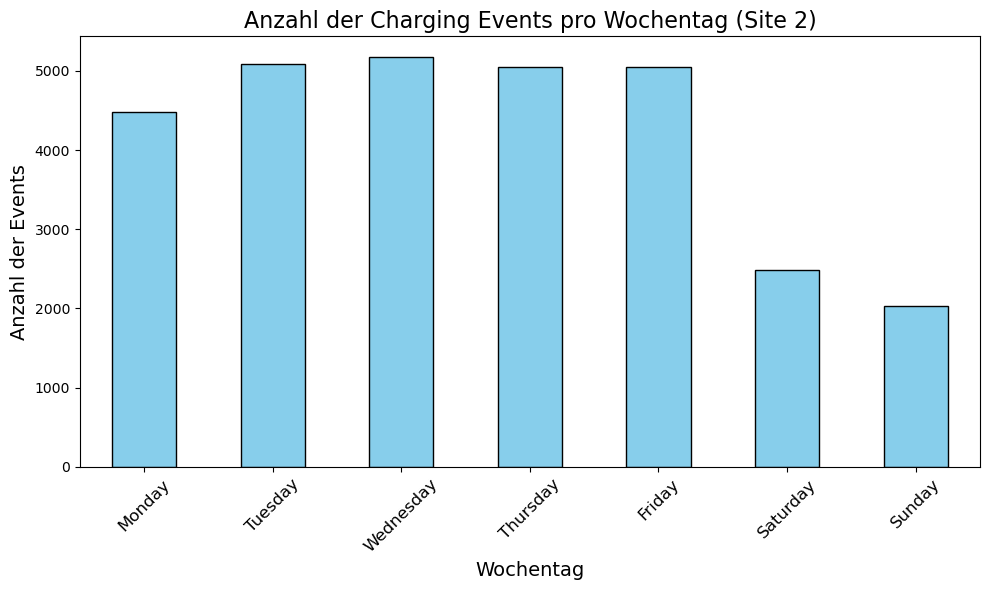

In [220]:
site_data = charging_set[charging_set['siteID'] == 2]

# Konvertiere die Spalte `connectionTime_date` in ein Datetime-Format
site_data['connection_date'] = pd.to_datetime(site_data['connectionTime'])

# Extrahiere den Wochentag
site_data['weekday'] = site_data['connection_date'].dt.day_name()

# Zähle die Anzahl der Charging Events pro Wochentag
weekday_counts = site_data['weekday'].value_counts()

# Sortiere die Wochentage in der korrekten Reihenfolge
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Charging Events pro Wochentag (Site 2)', fontsize=16)
plt.xlabel('Wochentag', fontsize=14)
plt.ylabel('Anzahl der Events', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


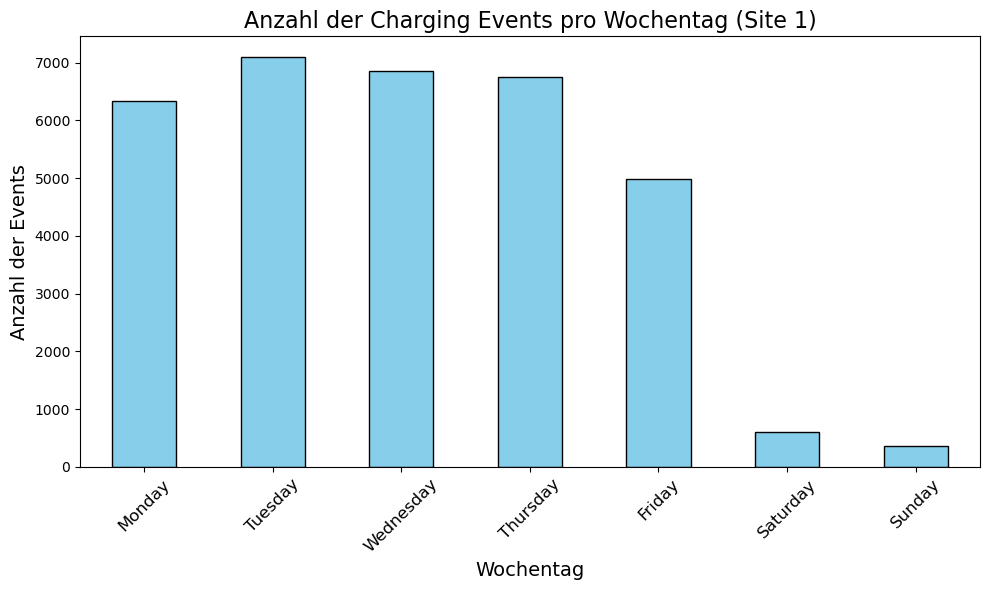

In [221]:
site_data = charging_set[charging_set['siteID'] == 1]

# Konvertiere die Spalte `connectionTime_date` in ein Datetime-Format
site_data['connection_date'] = pd.to_datetime(site_data['connectionTime'])

# Extrahiere den Wochentag
site_data['weekday'] = site_data['connection_date'].dt.day_name()

# Zähle die Anzahl der Charging Events pro Wochentag
weekday_counts = site_data['weekday'].value_counts()

# Sortiere die Wochentage in der korrekten Reihenfolge
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Charging Events pro Wochentag (Site 1)', fontsize=16)
plt.xlabel('Wochentag', fontsize=14)
plt.ylabel('Anzahl der Events', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


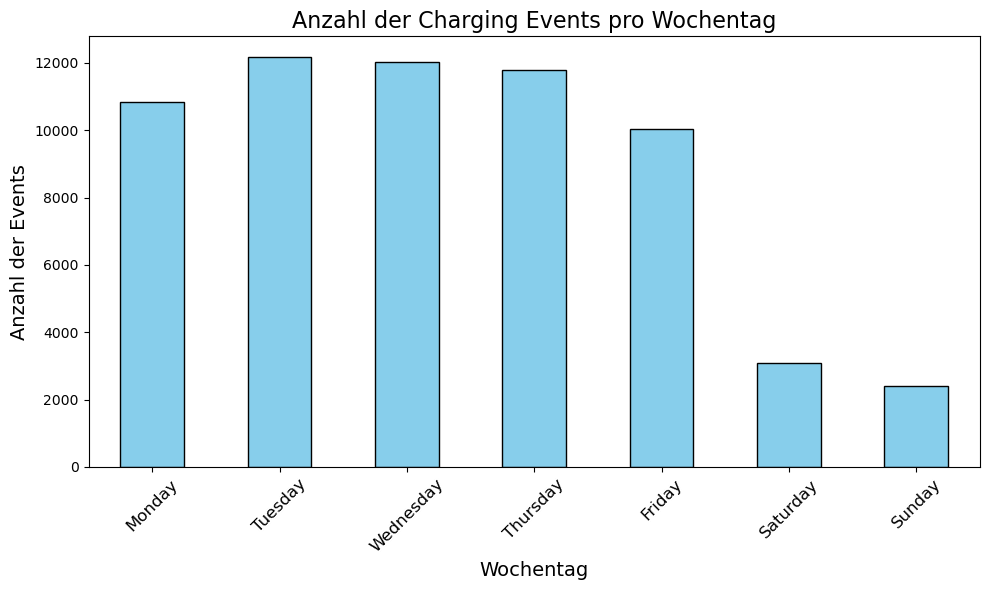

In [222]:
# Konvertiere die Spalte `connectionTime_date` in ein Datetime-Format
charging_set['connection_date'] = pd.to_datetime(charging_set['connectionTime'])

# Extrahiere den Wochentag
charging_set['weekday'] = charging_set['connection_date'].dt.day_name()

# Zähle die Anzahl der Charging Events pro Wochentag
weekday_counts = charging_set['weekday'].value_counts()

# Sortiere die Wochentage in der korrekten Reihenfolge
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Charging Events pro Wochentag', fontsize=16)
plt.xlabel('Wochentag', fontsize=14)
plt.ylabel('Anzahl der Events', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


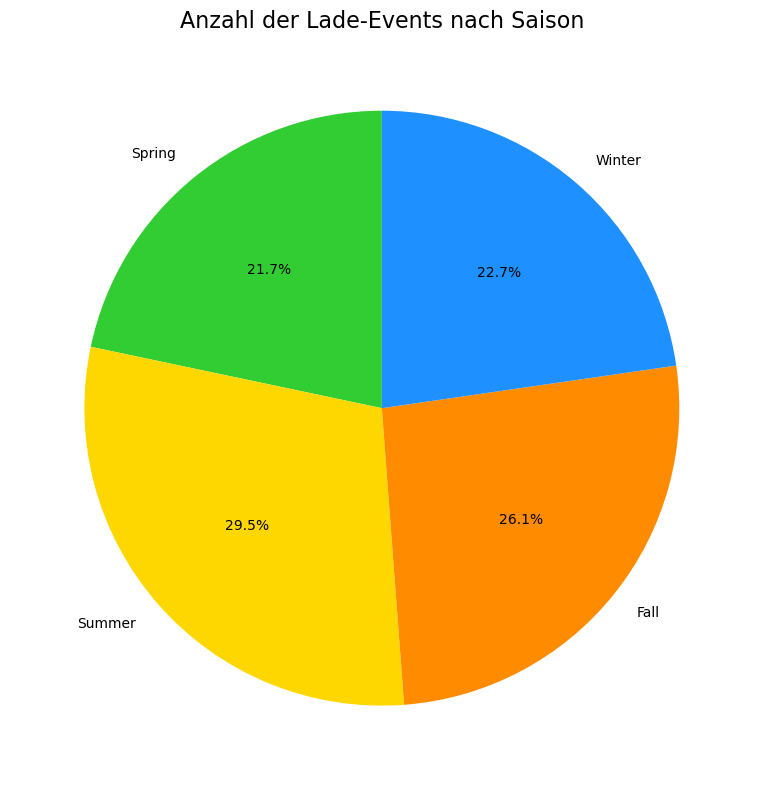

In [223]:
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])

# Aggregation auf Monatsbasis
events_per_month = charging_set.groupby(charging_set['connectionTime'].dt.month).size().reset_index(name='count')
events_per_month.rename(columns={'connectionTime': 'month'}, inplace=True)

# Mapping von Monaten zu Saisons
def map_month_to_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall
        return 'Fall'

# Hinzufügen einer "season"-Spalte
events_per_month['season'] = events_per_month['month'].apply(map_month_to_season)

# Aggregation der Events auf Basis der Saison
events_per_season = events_per_month.groupby('season')['count'].sum().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Pie Chart erstellen
plt.figure(figsize=(8, 8))
events_per_season.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#32CD32', '#FFD700', '#FF8C00', '#1E90FF'])
plt.title('Anzahl der Lade-Events nach Saison', fontsize=16)
plt.ylabel('')  # Entfernt die Standard-Y-Achsentitel
plt.tight_layout()

# Diagramm anzeigen
plt.show()


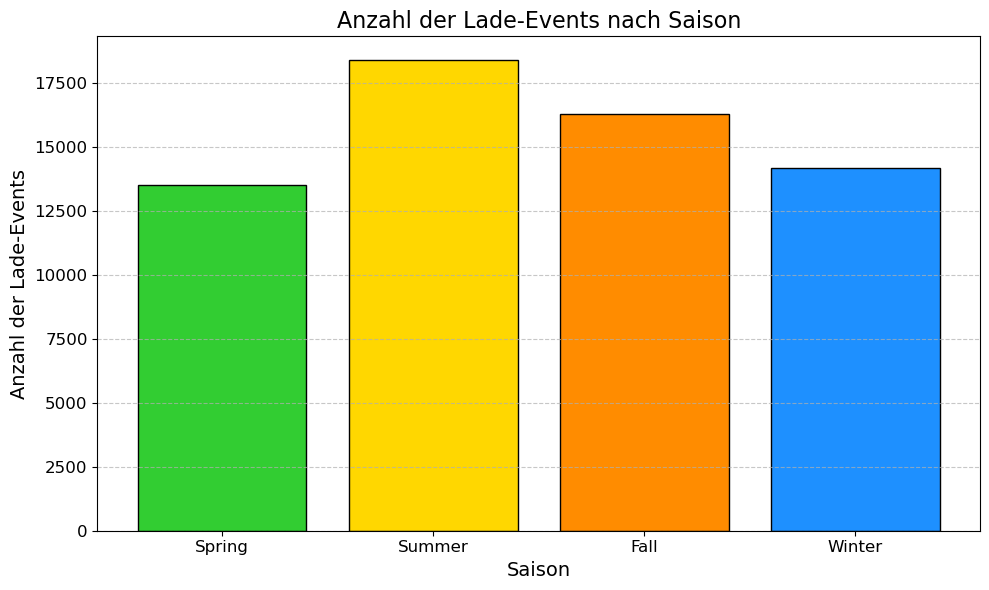

In [224]:
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])

# Aggregation auf Monatsbasis
events_per_month = charging_set.groupby(charging_set['connectionTime'].dt.month).size().reset_index(name='count')
events_per_month.rename(columns={'connectionTime': 'month'}, inplace=True)

# Mapping von Monaten zu Saisons
def map_month_to_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall
        return 'Fall'

# Hinzufügen einer "season"-Spalte
events_per_month['season'] = events_per_month['month'].apply(map_month_to_season)

# Aggregation der Events auf Basis der Saison
events_per_season = events_per_month.groupby('season')['count'].sum().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Visualisierung als Balkendiagramm
plt.figure(figsize=(10, 6))
plt.bar(events_per_season.index, events_per_season.values, color=['#32CD32', '#FFD700', '#FF8C00', '#1E90FF'], edgecolor='black')
plt.title('Anzahl der Lade-Events nach Saison', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Anzahl der Lade-Events', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


### KPIs:

- General Utilization (relative)
- ...

In [225]:
import plotly.express as px

# Convert durations to hours and extract the date
charging_set[['connectionDuration_hours', 'chargingDuration_hours']] = charging_set[['connectionDuration', 'chargingDuration']] / 3600
charging_set['connectionDate'] = charging_set['connectionTime'].dt.date

# Calculate total durations and available time per day
utilization_per_day = charging_set.groupby('connectionDate').agg(
    TotalConnectionTime=('connectionDuration_hours', 'sum'),
    TotalChargingTime=('chargingDuration_hours', 'sum')
).reset_index()

total_sites = charging_set['siteID'].nunique()
utilization_per_day['TotalAvailableTime'] = total_sites * 24

# Calculate utilization rates
utilization_per_day[['ConnectionUtilizationRate', 'ChargingUtilizationRate']] = utilization_per_day[['TotalConnectionTime', 'TotalChargingTime']].div(utilization_per_day['TotalAvailableTime'], axis=0) * 100

# Plotting function
def create_utilization_plot(data, y_column, title, line_color):
    return px.line(data, x='connectionDate', y=y_column, title=title,
                   labels={'connectionDate': 'Datum', y_column: 'Auslastung (%)'}
           ).update_traces(line_color=line_color).update_layout(
               title_font_size=18, legend_title_text="Legende", template="plotly_white",
               xaxis=dict(title="Datum"), yaxis=dict(title="Auslastung (%)")
           )

# Create and show plots
fig1 = create_utilization_plot(utilization_per_day, 'ConnectionUtilizationRate', 'Brutto-Auslastung (Verbindungszeit) der Ladestationen pro Tag', '#00008B')
fig2 = create_utilization_plot(utilization_per_day, 'ChargingUtilizationRate', 'Netto-Auslastung (Ladezeit) der Ladestationen pro Tag', '#FF8C00')

fig1.show()
fig2.show()


In [226]:
import numpy as np
import plotly.express as px

# Extract hour and calculate connection/charging time in hours
charging_set['connectionHour'] = charging_set['connectionTime'].dt.hour
total_stations = charging_set['stationID'].nunique()

hourly_utilization = charging_set.groupby('connectionHour').agg(
    TotalConnectionTime=('connectionDuration', 'sum'),
    TotalChargingTime=('chargingDuration', 'sum')
).reset_index()

# Convert durations to hours and calculate utilization ratios
hourly_utilization[['TotalConnectionTime_hours', 'TotalChargingTime_hours']] = hourly_utilization[['TotalConnectionTime', 'TotalChargingTime']] / 3600
hourly_utilization[['MeanConnectionUtilization', 'MeanChargingUtilization']] = hourly_utilization[['TotalConnectionTime_hours', 'TotalChargingTime_hours']].div(total_stations, axis=0)

# Plotting function
def create_utilization_plot(data, y_column, title, line_color):
    return px.line(data, x='connectionHour', y=y_column, title=title,
                   labels={'connectionHour': 'Stunde des Tages', y_column: 'Auslastung (0-1)'}
           ).update_traces(line_color=line_color).update_layout(
               title_font_size=18, legend_title_text="Legende", template="plotly_white",
               xaxis=dict(title="Stunde des Tages", tickmode='linear', tick0=0, dtick=1),
               yaxis=dict(title="Auslastung (0-1)", range=[0, 1])
           )

# Create and show plots
fig1 = create_utilization_plot(hourly_utilization, 'MeanConnectionUtilization', 'Durchschnittliche Brutto-Auslastung pro Stunde', '#00008B')
fig2 = create_utilization_plot(hourly_utilization, 'MeanChargingUtilization', 'Durchschnittliche Netto-Auslastung pro Stunde', '#FF8C00')

fig1.show()
fig2.show()


In [227]:
# Convert durations to hours and extract the month-year for grouping
charging_set[['connectionDuration_hours', 'chargingDuration_hours']] = charging_set[['connectionDuration', 'chargingDuration']] / 3600
charging_set['connectionMonth'] = charging_set['connectionTime'].dt.to_period('M')

# Group by connectionMonth and calculate total durations
utilization_per_month = charging_set.groupby('connectionMonth').agg(
    TotalConnectionTime=('connectionDuration_hours', 'sum'),
    TotalChargingTime=('chargingDuration_hours', 'sum')
).reset_index()

# Convert to datetime and calculate available time per month
utilization_per_month['connectionMonth'] = utilization_per_month['connectionMonth'].dt.to_timestamp()
total_sites = charging_set['siteID'].nunique()
utilization_per_month['TotalAvailableTime'] = total_sites * utilization_per_month['connectionMonth'].dt.days_in_month * 24

# Calculate utilization rates
utilization_per_month[['ConnectionUtilizationRate', 'ChargingUtilizationRate']] = utilization_per_month[['TotalConnectionTime', 'TotalChargingTime']].div(utilization_per_month['TotalAvailableTime'], axis=0) * 100

# Create plot function
def create_utilization_plot(data, y_column, title, color):
    return px.line(
        data, x='connectionMonth', y=y_column, title=title,
        labels={'connectionMonth': 'Monat', y_column: 'Auslastung (%)'}
    ).update_traces(line_color=color).update_layout(
        title_font_size=18, legend_title_text="Legende", template="plotly_white",
        xaxis=dict(title="Monat"), yaxis=dict(title="Auslastung (%)", range=[0, 1])
    )

# Create and show plots
fig1 = create_utilization_plot(utilization_per_month, 'ConnectionUtilizationRate', 'Brutto-Auslastung (Verbindungszeit) der Ladestationen pro Monat', '#00008B')
fig2 = create_utilization_plot(utilization_per_month, 'ChargingUtilizationRate', 'Netto-Auslastung (Ladezeit) der Ladestationen pro Monat', '#FF8C00')

fig1.show()
fig2.show()


In [228]:
# Convert connection and charging durations to hours, and extract connection month
charging_set['connectionDuration_hours'] = charging_set['connectionDuration'] / 3600
charging_set['chargingDuration_hours'] = charging_set['chargingDuration'] / 3600
charging_set['connectionMonth'] = charging_set['connectionTime'].dt.to_period('M')

# Group by connectionMonth and calculate total connection and charging times per month
utilization_per_month = charging_set.groupby('connectionMonth').agg(
    TotalConnectionTime=('connectionDuration_hours', 'sum'),
    TotalChargingTime=('chargingDuration_hours', 'sum')
).reset_index()

# Convert connectionMonth back to datetime and calculate total available time
utilization_per_month['connectionMonth'] = utilization_per_month['connectionMonth'].dt.to_timestamp()
total_sites = charging_set['siteID'].nunique()
utilization_per_month['TotalAvailableTime'] = total_sites * utilization_per_month['connectionMonth'].dt.days_in_month * 24

# Calculate utilization ratio and prepare the plot
utilization_per_month['UtilizationRatio'] = (utilization_per_month['TotalChargingTime'] / utilization_per_month['TotalConnectionTime']) * 100

# Visualization
fig3 = px.line(
    utilization_per_month,
    x='connectionMonth',
    y='UtilizationRatio',
    title='Verhältnis der Netto- zur Brutto-Auslastung der Ladestationen pro Monat',
    labels={'connectionMonth': 'Monat', 'UtilizationRatio': 'Verhältnis (%)'}
)

fig3.update_traces(line_color='#32CD32')  # Lime green
fig3.update_layout(
    title_font_size=18,
    legend_title_text="Legende",
    template="plotly_white",
    xaxis=dict(title="Monat"),
    yaxis=dict(title="Verhältnis (%)", range=[0, 100])  # Limit y-axis to 0-100%
)

# Show the plot
fig3.show()



In [229]:
import pandas as pd
import plotly.graph_objects as go

# Convert durations to hours
charging_set['connectionDuration_hours'] = charging_set['connectionDuration'] / 3600
charging_set['chargingDuration_hours'] = charging_set['chargingDuration'] / 3600

# Add time-based columns
charging_set['connectionDate'] = charging_set['connectionTime'].dt.date
charging_set['connectionWeek'] = charging_set['connectionTime'].dt.to_period('W').dt.start_time
charging_set['connectionMonth'] = charging_set['connectionTime'].dt.to_period('M').dt.start_time

def calculate_utilization(data, period_column):
    """Aggregate total connection/charging times and compute utilization ratio."""
    utilization = data.groupby(period_column).agg(
        TotalConnectionTime=('connectionDuration_hours', 'sum'),
        TotalChargingTime=('chargingDuration_hours', 'sum')
    ).reset_index()
    utilization['UtilizationRatio'] = (utilization['TotalChargingTime'] / utilization['TotalConnectionTime']) * 100
    return utilization

def plot_utilization(data, period, chart_type, title, color, mode='lines'):
    """Reusable function for plotting utilization ratio."""
    fig = go.Figure()
    if chart_type == 'line':
        fig.add_trace(go.Scatter(
            x=data[period],
            y=data['UtilizationRatio'],
            mode=mode,
            name=f'{title} (Line)',
            line=dict(color=color, width=2)
        ))
    elif chart_type == 'bar':
        fig.add_trace(go.Bar(
            x=data[period],
            y=data['UtilizationRatio'],
            name=f'{title} (Bar)',
            marker=dict(color=color, opacity=0.6)
        ))
    fig.update_layout(
        title=title,
        title_font_size=18,
        xaxis=dict(title=period.capitalize(), tickangle=45),
        yaxis=dict(title='Utilization Ratio (%)', range=[0, 100]),
        template="plotly_white"
    )
    return fig

# Calculate utilization for each period
utilization_daily = calculate_utilization(charging_set, 'connectionDate')
utilization_weekly = calculate_utilization(charging_set, 'connectionWeek')
utilization_monthly = calculate_utilization(charging_set, 'connectionMonth')

# Plot figures using the reusable function
plot_utilization(utilization_daily, 'connectionDate', 'line', 
                 'Utilization Ratio (Netto to Brutto) per Day', '#1E90FF').show()
plot_utilization(utilization_weekly, 'connectionWeek', 'line', 
                 'Utilization Ratio (Netto to Brutto) per Week (Line)', '#32CD32').show()
plot_utilization(utilization_weekly, 'connectionWeek', 'bar', 
                 'Utilization Ratio (Netto to Brutto) per Week (Bar)', '#32CD32').show()
plot_utilization(utilization_monthly, 'connectionMonth', 'bar', 
                 'Utilization Ratio (Netto to Brutto) per Month (Bar)', '#FFD700').show()



### KPI 2:
- Number of weekly active users over the whole timeframe

In [230]:
import pandas as pd
import plotly.express as px

# Ensure 'connectionTime' is a datetime object
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])

# Filter for registered users and add week/year for aggregation
registered_users = charging_set[charging_set['isRegistered'] == 1]
registered_users['week'] = registered_users['connectionTime'].dt.isocalendar().week
registered_users['year'] = registered_users['connectionTime'].dt.isocalendar().year

def aggregate_and_plot(data, title, color):
    """Aggregate unique users weekly and plot."""
    agg_data = (
        data.groupby(['year', 'week'])['userID']
        .nunique()
        .reset_index(name='UniqueUsers')
    )
    agg_data['YearWeek'] = pd.to_datetime(
        agg_data['year'].astype(str) + '-W' + agg_data['week'].astype(str) + '-1',
        format='%Y-W%U-%w'
    )
    fig = px.line(
        agg_data,
        x='YearWeek',
        y='UniqueUsers',
        title=title,
        labels={'YearWeek': 'Time', 'UniqueUsers': 'Unique Registered Users'}
    )
    fig.update_traces(line_color=color)
    fig.update_layout(
        title_font_size=18,
        xaxis=dict(
            title="Month",
            dtick="M1",
            tickformat="%b %Y",
            tickangle=-45,
        ),
        yaxis=dict(title="Unique Registered Users"),
        template="plotly_white"
    )
    return fig

# Generate plots
fig_all = aggregate_and_plot(
    registered_users,
    "Weekly Unique Registered Users Charging at EV Stations (All Sites)",
    color='#00008B'
)
fig_site1 = aggregate_and_plot(
    registered_users[registered_users['siteID'] == 1],
    "Weekly Unique Registered Users Charging at EV Stations (Site 1)",
    color='#FF8C00'
)
fig_site2 = aggregate_and_plot(
    registered_users[registered_users['siteID'] == 2],
    "Weekly Unique Registered Users Charging at EV Stations (Site 2)",
    color='#1f77b4'
)

# Show the graphs
fig_all.show()
fig_site1.show()
fig_site2.show()


In [231]:
import pandas as pd
import plotly.graph_objects as go

# Filter for registered users
registered_users = charging_set[charging_set['isRegistered'] == 1]

# Calculate the total connection and charging durations, and total number of sessions for registered users
total_connection_duration_registered = registered_users['connectionDuration'].sum()  # in hours
total_charging_duration_registered = registered_users['chargingDuration'].sum()  # in hours
total_sessions_registered = registered_users.shape[0]  # number of sessions (rows)

# Calculate the mean connection duration for registered users
mean_connection_duration_registered = total_connection_duration_registered / total_sessions_registered  # in hours

# Define the first KPI (average sessions per week for registered users)
mean_sessions_per_week = registered_users.groupby('userID')['connectionWeek'].nunique().mean()

# Calculate the total connection and charging durations, and total number of sessions for all users
total_connection_duration_all = charging_set['connectionDuration'].sum()  # in hours
total_charging_duration_all = charging_set['chargingDuration'].sum()  # in hours
total_sessions_all = charging_set.shape[0]  # number of sessions (rows)

# Calculate the mean connection and charging durations for all users (in hours)
mean_connection_duration_all = total_connection_duration_all / total_sessions_all  # in hours
mean_charging_duration_all = total_charging_duration_all / total_sessions_all  # in hours

# Define KPIs for tiles (first one for registered users, the last two for all)
kpis = {
    'Durchschnittliche Sitzungen pro Woche (Registrierte Nutzer)': mean_sessions_per_week,
    'Durchschnittliche Verbindungsdauer (Stunden) (Alle Nutzer)': mean_connection_duration_all,
    'Durchschnittliche Ladezeit (Stunden) (Alle Nutzer)': mean_charging_duration_all
}

# Visualization: Create tiles dynamically
fig = go.Figure()

# Create tiles for each KPI
for i, (title, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
        mode="number",
        value=value,
        title={"text": title},
        domain={'x': [i/3, (i+1)/3], 'y': [0, 1]},
        number={'font': {'size': 40}, 'suffix': " Sitzungen" if 'Sitzungen' in title else " Std."}
    ))

# Update layout
fig.update_layout(
    template="plotly_white",
    title="KPI für Nutzer",
    height=400,
    showlegend=False
)

# Show the visualization
fig.show()


### 3. Energy Consumption

- Energy Delivered by Session (Mean)
- Energy Requested by Session (Mean)
- Energy Consumed by Hour
- Max Energy Delivered within a session
- By Sites for all registered Users --> Times payment was required

In [232]:
import pandas as pd
import plotly.express as px

# Ensure connectionTime is datetime and extract the week
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])
charging_set['connectionWeek'] = charging_set['connectionTime'].dt.to_period('W').dt.to_timestamp()

# Weekly aggregation: energy delivered and session count
weekly_aggregation = charging_set.groupby('connectionWeek').agg(
    TotalEnergyDelivered=('kWhDelivered', 'sum'),
    TotalSessions=('sessionID', 'count')
).reset_index()

# Calculate per-session mean energy by week and overall
weekly_aggregation['MeanEnergyPerSession'] = weekly_aggregation['TotalEnergyDelivered'] / weekly_aggregation['TotalSessions']
overall_mean = charging_set['kWhDelivered'].sum() / charging_set['sessionID'].nunique()

# Bar chart with KPI annotation
fig = px.bar(
    weekly_aggregation,
    x='connectionWeek',
    y='MeanEnergyPerSession',
    title='Durchschnittlich Gelieferte Energie pro Sitzung (kWh) pro Woche',
    labels={'connectionWeek': 'Woche', 'MeanEnergyPerSession': 'Gelieferte Energie (kWh)'},
    template="plotly_white",
    color_discrete_sequence=['#1f77b4']  # Set bar color
).update_layout(
    title_font_size=18,
    xaxis_title="Woche",
    yaxis_title="Gelieferte Energie (kWh)",
    yaxis_range=[0, weekly_aggregation['MeanEnergyPerSession'].max() * 1.1]
).add_annotation(
    text=f"Gesamtdurchschnitt aller Sitzungen: {overall_mean:.2f} kWh",
    xref="paper", yref="paper",
    x=0, y=1.15,  # Place above graph, below title
    showarrow=False,
    font=dict(size=14, color="black", family="Arial"),
    align="left",
    xanchor="left"
)

fig.show()


In [233]:
import plotly.graph_objects as go

# Calculate and round the mean energy requested per session
mean_energy_requested = round(charging_set['kWhRequested'].mean())

# Create the KPI visualization
fig = go.Figure(go.Indicator(
    mode="number",
    value=mean_energy_requested,
    title={"text": "Durchschnittlich Angefragte Energie pro Sitzung (kWh)"},
    number={"suffix": " kWh", "font": {"size": 36}}
))

# Update layout for styling
fig.update_layout(
    template="plotly_white",
    height=300,
    title=dict(text="Key Performance Indicator", y=0.9, x=0.5, xanchor='center', yanchor='top')
)

fig.show()


In [234]:
import pandas as pd
import plotly.express as px

# Ensure connectionTime is in datetime format and extract hour and date
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])
charging_set['connectionHour'] = charging_set['connectionTime'].dt.hour
charging_set['connectionDate'] = charging_set['connectionTime'].dt.date

# Group by date and hour, and calculate total energy delivered
energy_per_hour_per_day = charging_set.groupby(['connectionDate', 'connectionHour']).agg(
    TotalEnergyDelivered=('kWhDelivered', 'sum')
).reset_index()

# First plot: without color differentiation
fig1 = px.line(
    energy_per_hour_per_day,
    x='connectionDate',
    y='TotalEnergyDelivered',
    title='Energie pro Stunde für alle Tage im Zeitraum (No Color)',
    labels={'connectionDate': 'Datum', 'TotalEnergyDelivered': 'Gelieferte Energie (kWh)'},
    template="plotly_white"
)

fig1.update_layout(
    title_font_size=18,
    xaxis_title="Datum",
    yaxis_title="Gelieferte Energie (kWh)",
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(range=[0, energy_per_hour_per_day['TotalEnergyDelivered'].max() * 1.1])  # Slightly extend y-axis
)

# Second plot: with color differentiation by hour
fig2 = px.line(
    energy_per_hour_per_day,
    x='connectionDate',
    y='TotalEnergyDelivered',
    color='connectionHour',  # Different color for each hour
    title='Energie pro Stunde für alle Tage im Zeitraum (Mit Farb-Differenzierung)',
    labels={'connectionDate': 'Datum', 'TotalEnergyDelivered': 'Gelieferte Energie (kWh)', 'connectionHour': 'Stunde des Tages'},
    template="plotly_white"
)

fig2.update_layout(
    title_font_size=18,
    xaxis_title="Datum",
    yaxis_title="Gelieferte Energie (kWh)",
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(range=[0, energy_per_hour_per_day['TotalEnergyDelivered'].max() * 1.1])  # Slightly extend y-axis
)

# Show both plots
fig1.show()
fig2.show()


In [235]:
import pandas as pd
import plotly.graph_objects as go

# Compute max energy delivered per hour (group by sessionID and connectionHour)
max_energy_per_hour = charging_set.groupby([charging_set['connectionTime'].dt.hour, 'sessionID'])['kWhDelivered'].sum().max()

# Create and configure the plot
fig = go.Figure()
fig.add_annotation(
    text=f"Max Energie pro Stunde in einer Sitzung: {max_energy_per_hour:.0f} kWh", 
    xref="paper", yref="paper", x=0.5, y=1.1, showarrow=False, 
    font=dict(size=16, color="black"), align="center", xanchor="center"
).update_layout(
    title="Maximale Energie pro Stunde in einer Sitzung", 
    title_font_size=18, template="plotly_white", showlegend=False,
    xaxis=dict(visible=False), yaxis=dict(visible=False), height=150
)

fig.show()


In [236]:
# import pandas as pd
# import plotly.express as px

# # Ensure connectionTime is in datetime format
# charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])

# # Filter the data for registered users who had to pay for the session
# registered_paid_users = charging_set[(charging_set['isRegistered'] == 1) & (charging_set['paymentRequired'] == True)]

# # Extract the date for grouping
# registered_paid_users['connectionDate'] = registered_paid_users['connectionTime'].dt.date

# # Group by date and siteID, and count distinct userID who had to pay
# payment_per_day = registered_paid_users.groupby(['connectionDate', 'siteID'])['userID'].nunique().reset_index()

# # Create the first graph for site 1
# fig1 = px.line(
#     payment_per_day[payment_per_day['siteID'] == 1],
#     x='connectionDate',
#     y='userID',
#     title='Anzahl der bezahlenden Benutzer pro Tag (Site 1)',
#     labels={'connectionDate': 'Datum', 'userID': 'Anzahl der Benutzer'},
#     template="plotly_white"
# )
# fig1.update_layout(title_font_size=18, xaxis_title="Datum", yaxis_title="Anzahl der Benutzer")

# # Show the graph for site 1
# fig1.show()

# # Create the second graph for site 2
# fig2 = px.line(
#     payment_per_day[payment_per_day['siteID'] == 2],
#     x='connectionDate',
#     y='userID',
#     title='Anzahl der bezahlenden Benutzer pro Tag (Site 2)',
#     labels={'connectionDate': 'Datum', 'userID': 'Anzahl der Benutzer'},
#     template="plotly_white"
# )
# fig2.update_layout(title_font_size=18, xaxis_title="Datum", yaxis_title="Anzahl der Benutzer")

# # Show the graph for site 2
# fig2.show()


In [237]:
import pandas as pd

# Filter for registered users (isRegistered == True)
registered_users = charging_set[charging_set['isRegistered'] == 1]

# Count how many registered users had to pay (paymentRequired == True)
payment_required_count = registered_users[registered_users['paymentRequired'] == True].shape[0]

# Count how many registered users did not have to pay (paymentRequired == -1)
payment_not_required_count = registered_users[registered_users['paymentRequired'] == -1].shape[0]

# Print the results
print(f"Total registered users who had to pay: {payment_required_count}")
print(f"Total registered users who did not have to pay: {payment_not_required_count}")


Total registered users who had to pay: 0
Total registered users who did not have to pay: 0
